In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pybaseball import schedule_and_record

In [5]:
#A quick analysis and visualization of three of the best Yankees baseball seasons that have ever happened: 
#the 1998 Derek Jeter's Team of the Century, 1961 Maris and Mantle chasing history, and the 1927 "Murderers Row" Yankees.

yankees27 = schedule_and_record(1927, 'NYY')
yankees61 = schedule_and_record(1961, 'CIN')
yankees98 = schedule_and_record(1998, 'SEA')

http://www.baseball-reference.com/teams/NYY/1927-schedule-scores.shtml
http://www.baseball-reference.com/teams/CIN/1961-schedule-scores.shtml
http://www.baseball-reference.com/teams/SEA/1998-schedule-scores.shtml


In [6]:
#Quick glance: Let's start by looking at some summary stats on each team's season. 
#The '27 & '61 Yankees had the best hot streak of all, winning 9 straight at one point. 
#The '27 Yankees had the highest scoring offense with an impressive 6.3 runs per game and only allowed 3.86 runs. 
#The '98 Yankees had a 31K average attendance per game which means they were playing in a packed house almost every single day
#Another thing to note about the '98 Team is that they scored 5.33 runs per game while allowing 5.31 runs, meaning 
#Those guys were winning a lot of closed games.
yankees27.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,155.000000,155.000000,155.000000,155.0,148.000000,155.000000
mean,6.290323,3.864516,9.103226,1.0,20243.702703,1.735484
std,3.939424,2.817103,0.968157,0.0,14658.394855,2.588881
min,0.000000,0.000000,5.000000,1.0,1500.000000,-4.000000
25%,3.000000,2.000000,9.000000,1.0,8750.000000,-1.000000
50%,6.000000,3.000000,9.000000,1.0,15000.000000,2.000000
75%,8.000000,6.000000,9.000000,1.0,28125.000000,3.000000
max,21.000000,14.000000,18.000000,1.0,72641.000000,9.000000


In [7]:
yankees61.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,154.000000,154.000000,154.000000,154.000000,135.000000,154.000000
mean,4.610390,4.240260,9.090909,1.772727,17078.992593,0.863636
std,2.715994,3.445287,0.575804,1.573983,11094.236561,2.983765
min,0.000000,0.000000,6.000000,1.000000,1216.000000,-8.000000
25%,3.000000,2.000000,9.000000,1.000000,9614.000000,-1.000000
50%,4.000000,3.000000,9.000000,1.000000,15589.000000,1.000000
75%,6.000000,6.000000,9.000000,2.000000,22624.500000,3.000000
max,14.000000,16.000000,13.000000,8.000000,72140.000000,9.000000


In [8]:
yankees98.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,161.000000,161.000000,161.000000,161.000000,159.000000,161.000000
mean,5.335404,5.310559,9.118012,3.254658,31845.496855,-0.149068
std,3.331561,3.356404,0.719191,0.583947,10702.415683,2.390636
min,0.000000,0.000000,9.000000,1.000000,7838.000000,-7.000000
25%,3.000000,3.000000,9.000000,3.000000,24661.500000,-2.000000
50%,5.000000,5.000000,9.000000,3.000000,30285.000000,-1.000000
75%,8.000000,8.000000,9.000000,4.000000,39613.500000,1.000000
max,18.000000,17.000000,17.000000,4.000000,57822.000000,6.000000


In [10]:
#Let's look at their records and runs 
#Create a numeric indicator of a win and take cumulative sum of wins-to-date at each point in the season
 
yankees27['win-count'] = np.where(yankees27['W/L']=='W', 1, 0).cumsum()
yankees61['win-count'] = np.where(yankees61['W/L']=='W', 1, 0).cumsum()
yankees98['win-count'] = np.where(yankees98['W/L']=='W', 1, 0).cumsum()

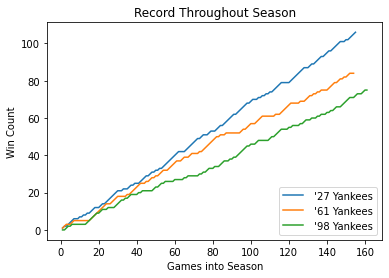

In [11]:
plt.plot(yankees27['win-count'],label=" '27 Yankees")
plt.plot(yankees61['win-count'],label=" '61 Yankees")
plt.plot(yankees98['win-count'],label=" '98 Yankees")
plt.legend(loc=4)
plt.xlabel('Games into Season')
plt.ylabel('Win Count')
plt.title('Record Throughout Season');

#Here the "Muderer's Row" murder the competition. Point '27 Yankees

In [12]:
#Let's take a look at score differential 
#Who had  had the largest win margins? The plot below shows cumulative run differential throughout the season.
#The '27 Yankees are the clear winners of this one, which is saying a lot considering they are being compared against
#two of the best Yankees teams of all time! Point Murderers Row.

yankees27['scorediff'] = (yankees27['R'] - yankees27['RA']).cumsum()
yankees61['scorediff'] = (yankees61['R'] - yankees61['RA']).cumsum()
yankees98['scorediff'] = (yankees98['R'] - yankees98['RA']).cumsum()

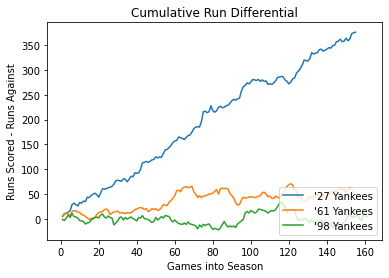

In [13]:
plt.plot(yankees27['scorediff'],label=" '27 Yankees")
plt.plot(yankees61['scorediff'],label=" '61 Yankees")
plt.plot(yankees98['scorediff'],label=" '98 Yankees")
plt.legend(loc=4)
plt.xlabel('Games into Season')
plt.ylabel('Runs Scored - Runs Against')
plt.title('Cumulative Run Differential');

In [ ]:
#While all three legendary seasons are memorable, 
#this brief analysis points toward the 1927 Yankees as being the best of the three.